<a href="https://colab.research.google.com/github/denisbebrovich/ML-DS/blob/main/%D0%9C%D0%9E%D0%B4%D0%B76.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Библиотеки


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Открываем файл

Предобработка датасета сделана в [ДЗ2](https://colab.research.google.com/drive/1eN_zIT-n-U6eux_kkbfc7QGee0evj1KN?usp=sharing), не хочу ее сюда пихать, а то опять озу не хватит)


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML/CarsNorm.csv', delimiter = ',')
data

,mark,Box,Drive_unit,Engine,Year,Car_type,Car_class,Speed_to_100,Price
0,53,2,3,1,2017,11,7,10.423527,3148000
1,6,1,2,1,2011,14,2,16.000000,215000
2,26,1,3,1,2017,13,7,17.000000,431000
3,21,2,2,1,2016,14,3,9.900000,930000
4,27,2,3,1,2013,13,7,8.800000,1499000
...,...,...,...,...,...,...,...,...,...
22471,5,2,3,1,2013,14,4,6.100000,1350000
22472,39,1,2,1,1998,14,4,12.500000,96000
22473,54,1,2,2,2008,10,8,13.700000,600000
22474,41,2,3,1,2020,13,7,6.000000,9107204


#Предварительная обработка

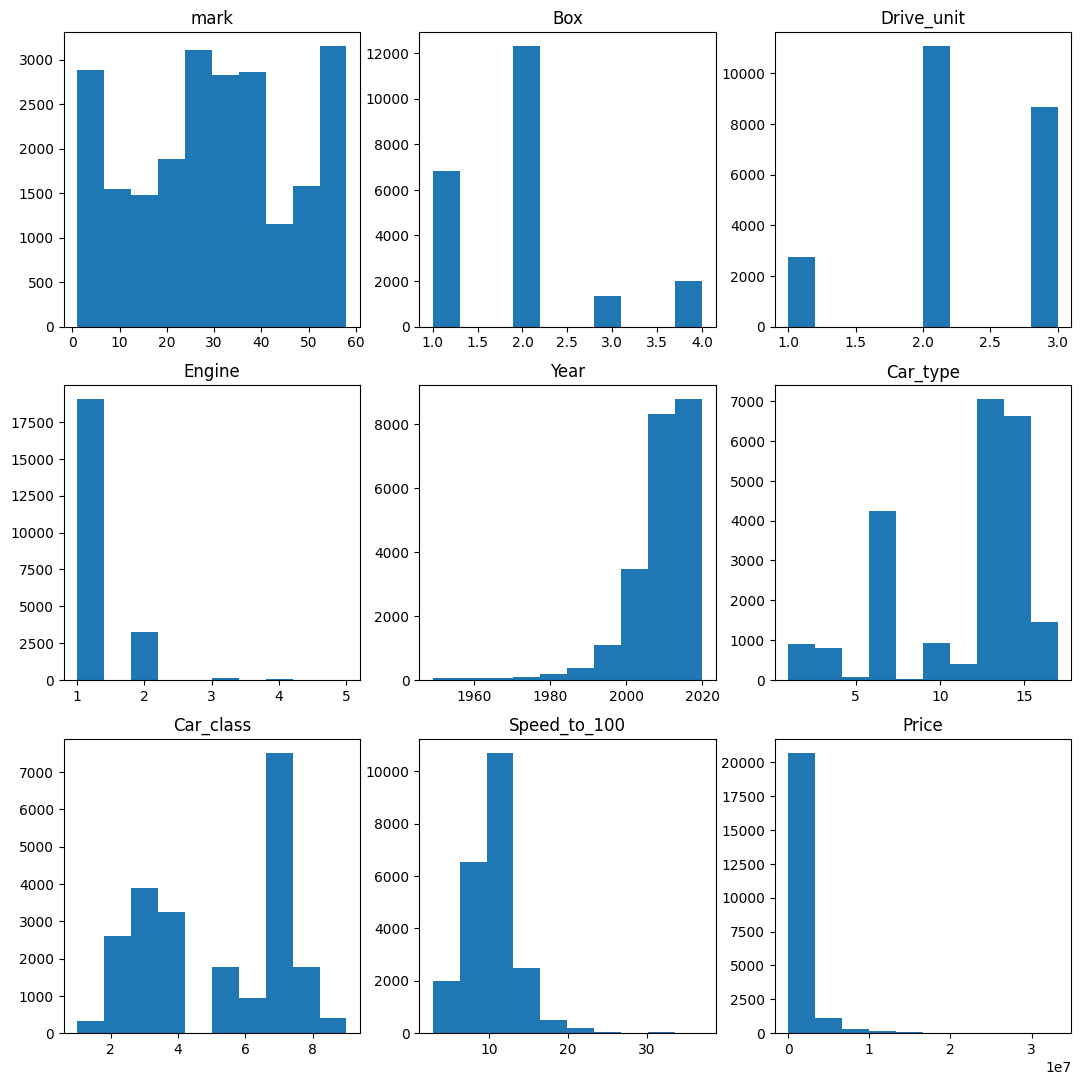

In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (13, 13))
axs = axs.flatten()

for i, col in enumerate(data.columns):
  axs[i].hist(data[col])
  axs[i].set_title(col)
plt.show()

распределения ненормальные, поэтому нужна нормализация

In [ ]:
data['Year'] = data['Year'] - data['Year'].min() + 1
data

,mark,Box,Drive_unit,Engine,Year,Car_type,Car_class,Speed_to_100,Price
0,53,2,3,1,69,11,7,10.423527,3148000
1,6,1,2,1,63,14,2,16.000000,215000
2,26,1,3,1,69,13,7,17.000000,431000
3,21,2,2,1,68,14,3,9.900000,930000
4,27,2,3,1,65,13,7,8.800000,1499000
...,...,...,...,...,...,...,...,...,...
22471,5,2,3,1,65,14,4,6.100000,1350000
22472,39,1,2,1,50,14,4,12.500000,96000
22473,54,1,2,2,60,10,8,13.700000,600000
22474,41,2,3,1,72,13,7,6.000000,9107204


In [ ]:
data.describe()

,mark,Box,Drive_unit,Engine,Year,Car_type,Car_class,Speed_to_100,Price
count,22476.000000,22476.000000,22476.000000,22476.000000,22476.000000,22476.000000,22476.000000,22476.000000,2.247600e+04
mean,29.695408,1.933129,2.264371,1.163819,61.342054,11.177923,5.121418,10.389799,1.330963e+06
std,16.736081,0.844178,0.661381,0.406445,8.709859,4.048425,2.112347,3.228713,2.087216e+06
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.800000,2.000000e+04
25%,15.000000,1.000000,2.000000,1.000000,58.000000,7.000000,3.000000,8.400000,3.730000e+05
50%,33.000000,2.000000,2.000000,1.000000,63.000000,13.000000,5.000000,10.423527,6.800000e+05
75%,42.000000,2.000000,3.000000,1.000000,67.000000,14.000000,7.000000,12.000000,1.420000e+06
max,58.000000,4.000000,3.000000,5.000000,72.000000,17.000000,9.000000,37.000000,3.321500e+07


нормализация

In [ ]:
pt = PowerTransformer(method = 'box-cox')
arr = pt.fit_transform(data)
new_df = pd.DataFrame(arr, columns=data.columns)
new_df

,mark,Box,Drive_unit,Engine,Year,Car_type,Car_class,Speed_to_100,Price
0,1.313174,0.299428,1.147307,-0.425027,1.065994,-0.249755,0.888917,0.103435,1.364551
1,-1.458154,-1.335813,-0.457201,-0.425027,0.048062,0.732403,-1.510956,1.629319,-1.172606
2,-0.143178,-1.335813,1.147307,-0.425027,1.065994,0.381721,0.888917,1.866835,-0.476531
3,-0.441660,0.299428,-0.457201,-0.425027,0.879700,0.732403,-0.994622,-0.063243,0.261010
4,-0.084953,0.299428,1.147307,-0.425027,0.361369,0.381721,0.888917,-0.431699,0.702425
...,...,...,...,...,...,...,...,...,...
22471,-1.538424,0.299428,1.147307,-0.425027,0.361369,0.732403,-0.501935,-1.474231,0.606667
22472,0.584074,-1.335813,-0.457201,-0.425027,-1.446256,0.732403,-0.501935,0.718880,-2.015781
22473,1.363624,-1.335813,-0.457201,2.352514,-0.376556,-0.530119,1.332308,1.046626,-0.155212
22474,0.691144,0.299428,1.147307,-0.425027,1.667626,0.381721,0.888917,-1.517786,2.263972


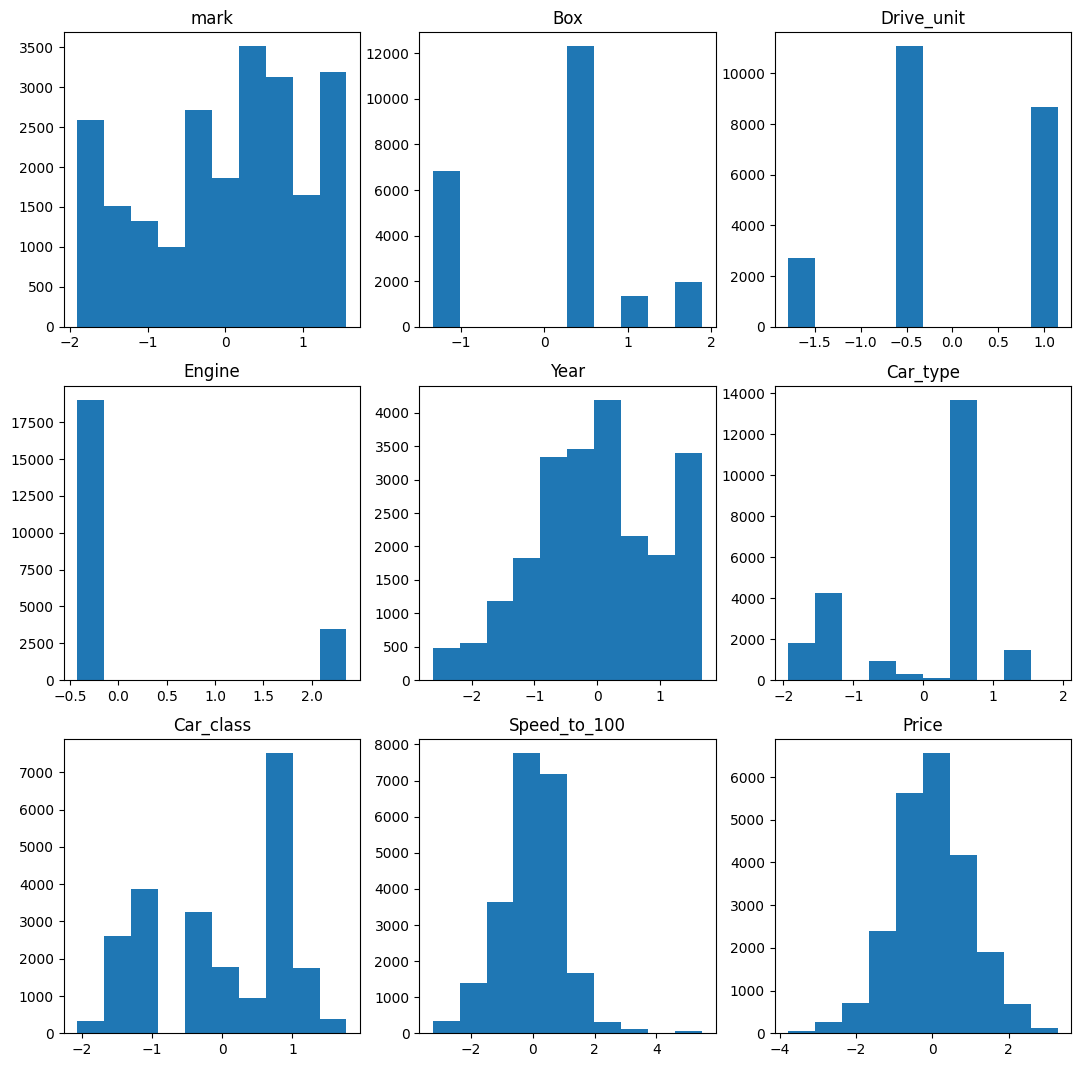

In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (13, 13))
axs = axs.flatten()

for i, col in enumerate(new_df.columns):
  axs[i].hist(new_df[col])
  axs[i].set_title(col)
plt.show()

Стало лучше, перейдем к стандартизации, её можно применить так как распределение в большинстве фич близко к нормальному

In [ ]:
ss = StandardScaler()
new_arr = ss.fit_transform(new_df)
df = pd.DataFrame(data = new_arr, columns = new_df.columns)
df

,mark,Box,Drive_unit,Engine,Year,Car_type,Car_class,Speed_to_100,Price
0,1.313174,0.299428,1.147307,-0.425027,1.065994,-0.249755,0.888917,0.103435,1.364551
1,-1.458154,-1.335813,-0.457201,-0.425027,0.048062,0.732403,-1.510956,1.629319,-1.172606
2,-0.143178,-1.335813,1.147307,-0.425027,1.065994,0.381721,0.888917,1.866835,-0.476531
3,-0.441660,0.299428,-0.457201,-0.425027,0.879700,0.732403,-0.994622,-0.063243,0.261010
4,-0.084953,0.299428,1.147307,-0.425027,0.361369,0.381721,0.888917,-0.431699,0.702425
...,...,...,...,...,...,...,...,...,...
22471,-1.538424,0.299428,1.147307,-0.425027,0.361369,0.732403,-0.501935,-1.474231,0.606667
22472,0.584074,-1.335813,-0.457201,-0.425027,-1.446256,0.732403,-0.501935,0.718880,-2.015781
22473,1.363624,-1.335813,-0.457201,2.352514,-0.376556,-0.530119,1.332308,1.046626,-0.155212
22474,0.691144,0.299428,1.147307,-0.425027,1.667626,0.381721,0.888917,-1.517786,2.263972


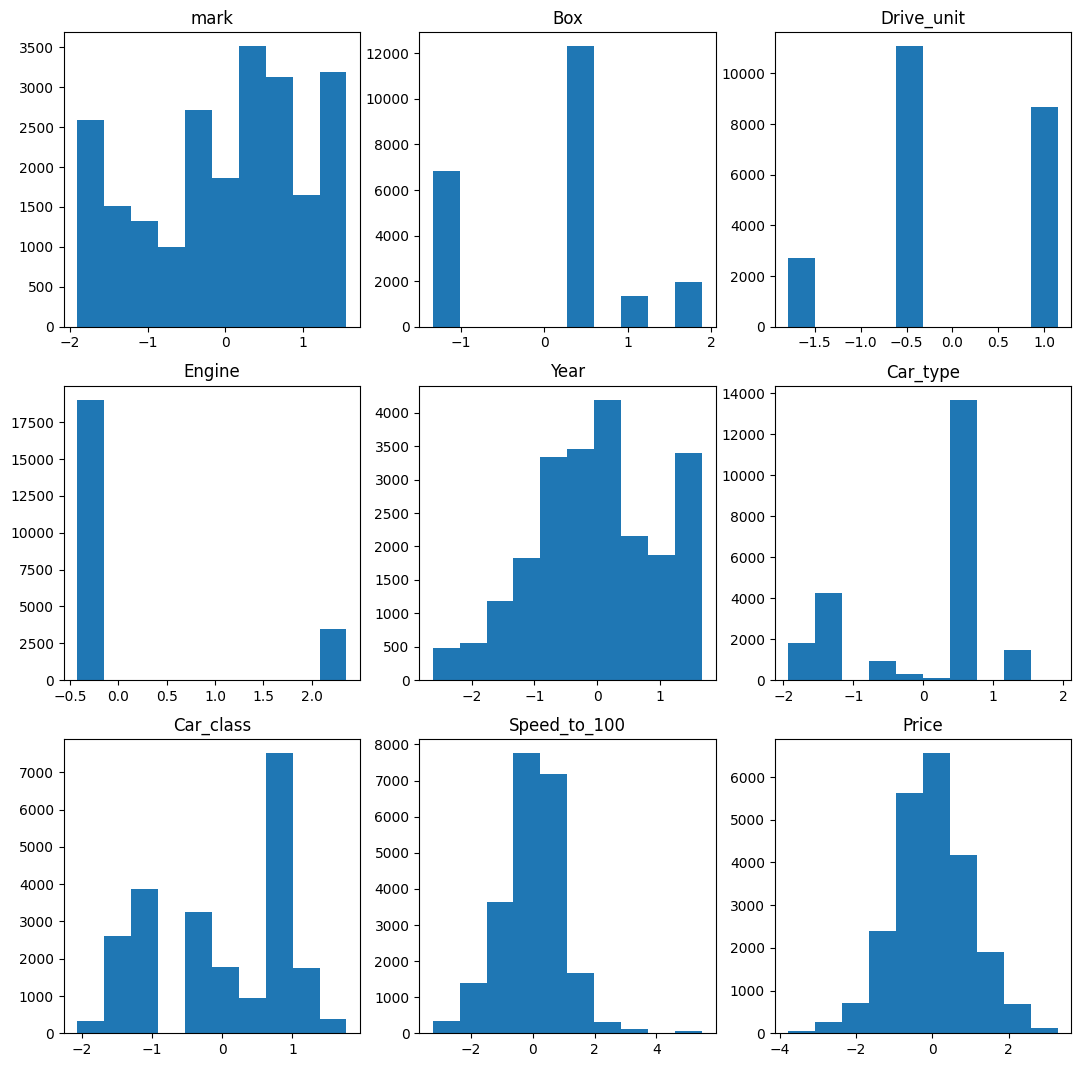

In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (13, 13))
axs = axs.flatten()

for i, col in enumerate(df.columns):
  axs[i].hist(df[col])
  axs[i].set_title(col)
plt.show()

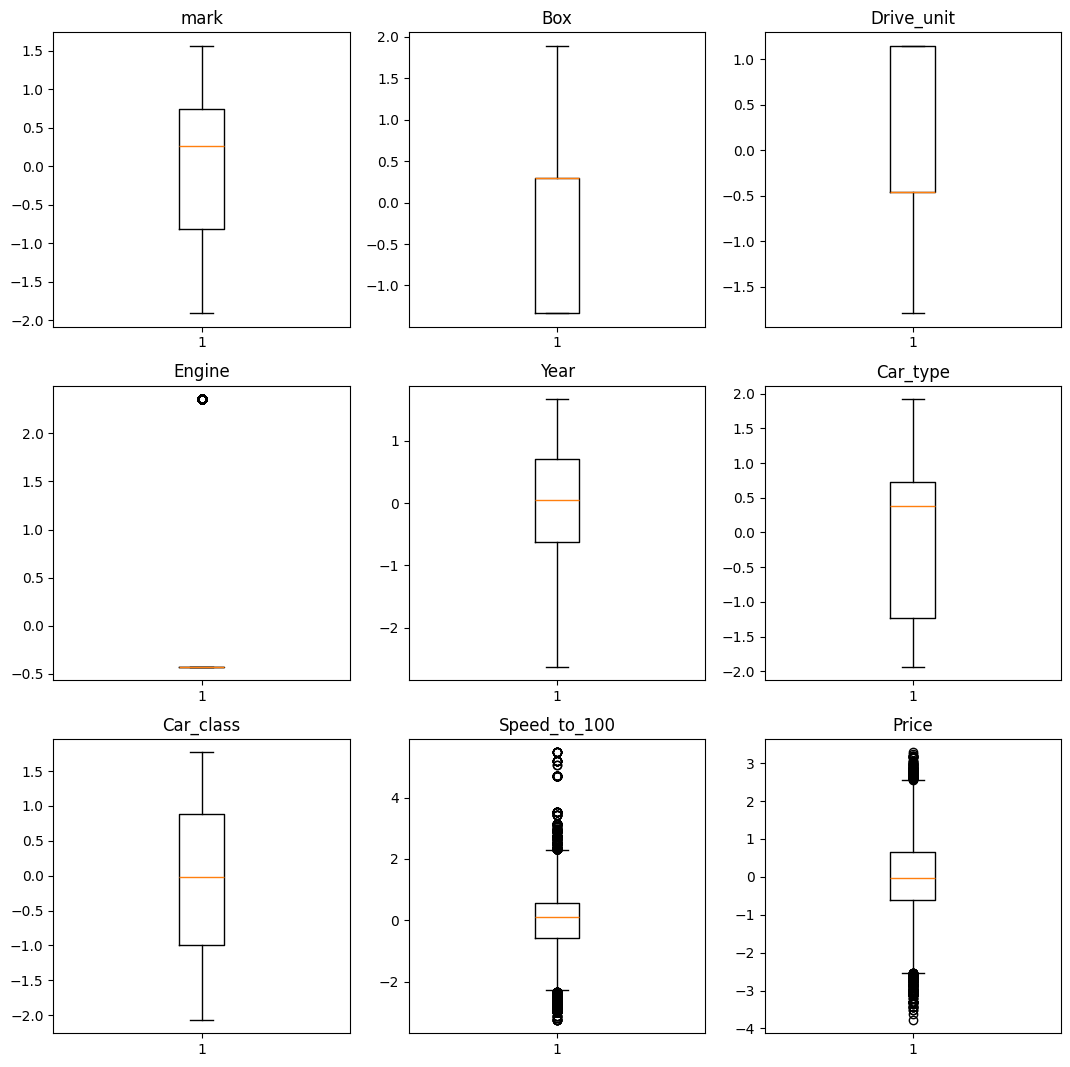

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
axs = axs.flatten()

for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
plt.show()

Видим, что есть выбросы в целевой переменной,во времени до 100кмч, и в мощности мотора

In [ ]:
df = df[df['Engine'] < 2]
df

,mark,Box,Drive_unit,Engine,Year,Car_type,Car_class,Speed_to_100,Price
0,1.313174,0.299428,1.147307,-0.425027,1.065994,-0.249755,0.888917,0.103435,1.364551
1,-1.458154,-1.335813,-0.457201,-0.425027,0.048062,0.732403,-1.510956,1.629319,-1.172606
2,-0.143178,-1.335813,1.147307,-0.425027,1.065994,0.381721,0.888917,1.866835,-0.476531
3,-0.441660,0.299428,-0.457201,-0.425027,0.879700,0.732403,-0.994622,-0.063243,0.261010
4,-0.084953,0.299428,1.147307,-0.425027,0.361369,0.381721,0.888917,-0.431699,0.702425
...,...,...,...,...,...,...,...,...,...
22470,-1.804529,1.893584,-0.457201,-0.425027,0.700268,-1.409541,-0.994622,-0.063243,0.279962
22471,-1.538424,0.299428,1.147307,-0.425027,0.361369,0.732403,-0.501935,-1.474231,0.606667
22472,0.584074,-1.335813,-0.457201,-0.425027,-1.446256,0.732403,-0.501935,0.718880,-2.015781
22474,0.691144,0.299428,1.147307,-0.425027,1.667626,0.381721,0.888917,-1.517786,2.263972


In [ ]:
Q1_Price = df['Price'].quantile(0.25)
Q3_Price = df['Price'].quantile(0.75)

# Вычисление IQR
IQR_Price = Q3_Price - Q1_Price

# Определение границ для выбросов
lower_bound_Price = Q1_Price - 1.5 * IQR_Price
upper_bound_Price = Q3_Price + 1.5 * IQR_Price

# Вывод границ
print(f"Lower Bound: {lower_bound_Price}")
print(f"Upper Bound: {upper_bound_Price}")

# Фильтрация значений, которые не являются выбросами
df_Price = df[(df['Price'] >= lower_bound_Price) & (df['Price'] <= upper_bound_Price)]
df_Price

Lower Bound: -2.452182166279018
Upper Bound: 2.2684855722289243


,mark,Box,Drive_unit,Engine,Year,Car_type,Car_class,Speed_to_100,Price
0,1.313174,0.299428,1.147307,-0.425027,1.065994,-0.249755,0.888917,0.103435,1.364551
1,-1.458154,-1.335813,-0.457201,-0.425027,0.048062,0.732403,-1.510956,1.629319,-1.172606
2,-0.143178,-1.335813,1.147307,-0.425027,1.065994,0.381721,0.888917,1.866835,-0.476531
3,-0.441660,0.299428,-0.457201,-0.425027,0.879700,0.732403,-0.994622,-0.063243,0.261010
4,-0.084953,0.299428,1.147307,-0.425027,0.361369,0.381721,0.888917,-0.431699,0.702425
...,...,...,...,...,...,...,...,...,...
22470,-1.804529,1.893584,-0.457201,-0.425027,0.700268,-1.409541,-0.994622,-0.063243,0.279962
22471,-1.538424,0.299428,1.147307,-0.425027,0.361369,0.732403,-0.501935,-1.474231,0.606667
22472,0.584074,-1.335813,-0.457201,-0.425027,-1.446256,0.732403,-0.501935,0.718880,-2.015781
22474,0.691144,0.299428,1.147307,-0.425027,1.667626,0.381721,0.888917,-1.517786,2.263972


In [ ]:
Q1_Speed_to_100 = df_Price['Speed_to_100'].quantile(0.25)
Q3_Speed_to_100 = df_Price['Speed_to_100'].quantile(0.75)

# Вычисление IQR
IQR_Speed_to_100 = Q3_Speed_to_100 - Q1_Speed_to_100

# Определение границ для выбросов
lower_bound_Speed_to_100 = Q1_Speed_to_100 - 1.5 * IQR_Speed_to_100
upper_bound_Speed_to_100 = Q3_Speed_to_100 + 1.5 * IQR_Speed_to_100

# Вывод границ
print(f"Lower Bound: {lower_bound_Speed_to_100}")
print(f"Upper Bound: {upper_bound_Speed_to_100}")

# Фильтрация значений, которые не являются выбросами
df_filtered = df_Price[(df_Price['Speed_to_100'] >= lower_bound_Speed_to_100) & (df_Price['Speed_to_100'] <= upper_bound_Speed_to_100)]
df_filtered

Lower Bound: -2.20748959527279
Upper Bound: 2.2472215719511417


,mark,Box,Drive_unit,Engine,Year,Car_type,Car_class,Speed_to_100,Price
0,1.313174,0.299428,1.147307,-0.425027,1.065994,-0.249755,0.888917,0.103435,1.364551
1,-1.458154,-1.335813,-0.457201,-0.425027,0.048062,0.732403,-1.510956,1.629319,-1.172606
2,-0.143178,-1.335813,1.147307,-0.425027,1.065994,0.381721,0.888917,1.866835,-0.476531
3,-0.441660,0.299428,-0.457201,-0.425027,0.879700,0.732403,-0.994622,-0.063243,0.261010
4,-0.084953,0.299428,1.147307,-0.425027,0.361369,0.381721,0.888917,-0.431699,0.702425
...,...,...,...,...,...,...,...,...,...
22470,-1.804529,1.893584,-0.457201,-0.425027,0.700268,-1.409541,-0.994622,-0.063243,0.279962
22471,-1.538424,0.299428,1.147307,-0.425027,0.361369,0.732403,-0.501935,-1.474231,0.606667
22472,0.584074,-1.335813,-0.457201,-0.425027,-1.446256,0.732403,-0.501935,0.718880,-2.015781
22474,0.691144,0.299428,1.147307,-0.425027,1.667626,0.381721,0.888917,-1.517786,2.263972


In [ ]:
df_filtered.describe()

,mark,Box,Drive_unit,Engine,Year,Car_type,Car_class,Speed_to_100,Price
count,17967.000000,17967.000000,17967.000000,1.796700e+04,17967.000000,17967.000000,17967.000000,17967.000000,17967.000000
mean,0.001589,0.012931,-0.091702,-4.250273e-01,-0.044454,-0.005411,-0.136661,0.005825,-0.125002
std,0.992951,1.021653,0.948779,1.357285e-13,0.954356,1.032025,0.991447,0.831385,0.853355
min,-1.909619,-1.335813,-1.789889,-4.250273e-01,-2.620476,-1.931930,-2.066022,-2.180232,-2.438060
25%,-0.820117,-1.335813,-0.457201,-4.250273e-01,-0.631135,-1.409541,-0.994622,-0.536973,-0.681932
50%,0.199951,0.299428,-0.457201,-4.250273e-01,-0.099373,0.381721,-0.501935,0.103435,-0.139319
75%,0.797153,0.299428,1.147307,-4.250273e-01,0.527543,0.732403,0.888917,0.547842,0.453215
max,1.563564,1.893584,1.147307,-4.250273e-01,1.667626,1.922003,1.768108,2.207770,2.263972


In [ ]:
df.to_csv('/content/drive/MyDrive/ML/CarsReady.csv', index = False)

Подчистили, конечно, пропало 5к значений, но это не очень страшно

#Модель

In [ ]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [ ]:
Y

,Price
0,1.364551
1,-1.172606
2,-0.476531
3,0.261010
4,0.702425
...,...
22470,0.279962
22471,0.606667
22472,-2.015781
22474,2.263972


In [ ]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X, Y, train_size = 0.8, test_size= 0.2, random_state= 42)
trainX, testX, trainY, testY

(           mark       Box  Drive_unit    Engine      Year  Car_type  \
 2318   0.691144  0.299428    1.147307 -0.425027  1.459797  0.381721   
 1481   1.413884 -1.335813   -0.457201 -0.425027 -1.527567  1.502711   
 16117 -1.804529  1.893584    1.147307 -0.425027  0.201592  0.381721   
 20926  0.530121  1.236870    1.147307 -0.425027 -0.099373  0.381721   
 14554 -0.201862  0.299428   -0.457201 -0.425027  1.065994  0.732403   
 ...         ...       ...         ...       ...       ...       ...   
 13286  0.584074 -1.335813   -0.457201 -0.425027 -1.077094 -1.409541   
 14113 -1.380581  0.299428    1.147307 -0.425027  0.527543  0.381721   
 6309   1.313174  1.236870   -0.457201 -0.425027  0.361369 -1.409541   
 997    1.006220 -1.335813   -0.457201 -0.425027  1.667626 -1.226627   
 18623  0.797153 -1.335813   -0.457201 -0.425027  0.201592  0.732403   
 
        Car_class  Speed_to_100  
 2318    0.888917     -2.558092  
 1481   -0.501935     -0.294654  
 16117   0.888917     -0.791680 

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(trainX, trainY)
prediction = model.predict(testX)
prediction

array([-0.28506599, -0.56328944, -0.0402681 , ..., -2.28554444,
       -0.59881331,  0.20641914])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(testY, prediction)
r2 = r2_score(testY, prediction)
print('mse:', mse)
print('r^2:', r2)

mse: 0.28064217685680487
r^2: 0.7094330383326442


Метрики получились довольно неплохие, как для линейной бэйзлайн модели.

In [ ]:
coefs = pd.DataFrame(data = model.coef_).T
coefs.columns = ['mark', 'Box', 'Drive_unit', 'Engine',	'Year',	'Car_type',	'Car_class',	'Speed_to_100']
coefs

,mark,Box,Drive_unit,Engine,Year,Car_type,Car_class,Speed_to_100
0,0.037243,0.133105,-0.02856,2.775558e-17,0.513955,0.017951,0.249111,-0.332651


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Оценка модели с помощью кросс-валидации
scores = cross_val_score(model, X = X, y = Y, cv=kf, scoring = 'r2')
print("Оценки по фолдам:", scores)
print("Средняя оценка:", scores.mean())

Оценки по фолдам: [0.69787226 0.72200528 0.73674779 0.69756837 0.68982125 0.73166874
 0.70400782 0.70353214 0.71377588 0.72007026]
Средняя оценка: 0.7117069770192417


почти тот же показатель R2. И не плохо, и не хорошо

#РСА

РСА пробуем

In [ ]:
from sklearn.decomposition import PCA
comps = 7
pca = PCA(n_components = comps)
pca.fit(X)

PCA(n_components=7)

In [ ]:
pca_df = pca.transform(X)
pca_df

array([[-1.33721366,  0.61662376,  1.54568888, ...,  0.62487092,
         0.13711869,  0.28589273],
       [ 1.92111715,  0.02686369, -0.97964659, ...,  1.51929025,
         0.69810621,  0.05975722],
       [ 0.13690967,  1.43851729,  0.297265  , ...,  2.23939106,
         0.94631428,  0.98534816],
       ...,
       [ 1.83014423,  1.3168656 , -0.05615088, ..., -0.28597756,
        -0.38438177, -0.13258823],
       [-2.52241423,  0.37310707,  0.80126135, ...,  0.70324293,
        -0.9430828 ,  0.17528103],
       [-1.93618018,  0.32014054,  1.1991484 , ...,  0.7754082 ,
         1.20034099,  0.63648857]])

In [ ]:
Y.isna().sum()

0

In [ ]:
pca_data = pd.DataFrame()
pca_columns = ['pca-{}'.format(x+1) for x in range(0, comps)]
pca_data.loc[:, pca_columns] = pca_df
pca_data['y'] = Y
pca_data

,pca-1,pca-2,pca-3,pca-4,pca-5,pca-6,pca-7,y
0,-1.337214,0.616624,1.545689,-0.816021,0.624871,0.137119,0.285893,1.364551
1,1.921117,0.026864,-0.979647,1.307552,1.51929,0.698106,0.059757,-1.172606
2,0.136910,1.438517,0.297265,-0.434584,2.239391,0.946314,0.985348,-0.476531
3,-0.176718,-0.611956,0.034402,1.419769,0.415099,0.020635,0.106312,0.261010
4,-1.504090,0.809404,-0.067617,-0.290888,0.354639,0.186953,-0.056662,0.702425
...,...,...,...,...,...,...,...,...
19032,-0.728387,-2.679393,-0.761917,0.162694,-0.009036,1.350603,-0.420151,-1.414106
19033,-1.619870,-0.048781,-1.343503,0.89494,0.636371,-0.256761,-1.150591,0.209111
19034,1.830144,1.316866,-0.056151,0.186074,-0.285978,-0.384382,-0.132588,0.142547
19035,-2.522414,0.373107,0.801261,-0.059306,0.703243,-0.943083,0.175281,1.161938


In [ ]:
pca_data.isna().sum()

,0
pca-1,0
pca-2,0
pca-3,0
pca-4,0
pca-5,0
pca-6,0
pca-7,0
y,2889


##анализ графиков, смотрим сколько компонент оставить

In [ ]:
corMat = pca_data.corr()
targetCor = corMat['y'].to_frame(name='PriceCorrelation')
targetCor = targetCor.sort_values(by = 'PriceCorrelation', ascending = False, key = abs)
targetCor.style.background_gradient(vmin=-1, vmax=1)

,PriceCorrelation
y,1.000000
pca-1,-0.012387
pca-5,0.011202
pca-4,-0.010263
pca-6,0.009667
pca-7,0.004844
pca-2,-0.002881
pca-3,-0.000384


In [ ]:
explainedVariance = pca.explained_variance_ratio_
explainedVariance

array([0.28512586, 0.17664826, 0.14460752, 0.13517581, 0.10139345,
       0.08836103, 0.06868807])

In [ ]:
import plotly.graph_objects as go

def plot_line(x,y,title_x = '', title_y = '', ):
    fig = go.Figure()
    # рисуем с помощью библиотеки plotly
    fig.add_trace(
        go.Scatter(
        x=x,
        y=y,
        mode='lines+markers',
        opacity=0.7,
        marker=dict(size = 5,
                    color='LightSkyBlue',
                    line=dict(
                        color='Blue',
                        width=1
            )),

        )
    )
    fig.update_layout(
            width=1000,
            height=600,
            xaxis_title=title_x,
            yaxis_title=title_y,
            yaxis_type = "log",
        template = "plotly_dark"
            )


    fig.show()


In [ ]:
plot_line(np.array(range(len(explainedVariance)))+1,
          np.cumsum(explainedVariance))

In [ ]:
plot_line(np.array(range(len(explainedVariance)))+1,
          explainedVariance)

##Pca №2

In [ ]:
comps = 5
pca5 = PCA(n_components = comps)
pca5.fit(X)

PCA(n_components=5)

In [ ]:
pca_df5 = pca5.transform(X)
pca_df5

array([[-1.33721366,  0.61662376,  1.54568888, -0.81602129,  0.62487092],
       [ 1.92111715,  0.02686369, -0.97964659,  1.30755206,  1.51929025],
       [ 0.13690967,  1.43851729,  0.297265  , -0.43458401,  2.23939106],
       ...,
       [ 1.83014423,  1.3168656 , -0.05615088,  0.18607446, -0.28597756],
       [-2.52241423,  0.37310707,  0.80126135, -0.05930611,  0.70324293],
       [-1.93618018,  0.32014054,  1.1991484 ,  0.08736566,  0.7754082 ]])

In [ ]:
Y.isna().sum()

0

In [ ]:
pca_data5 = pd.DataFrame()
pca_columns5 = ['pca-{}'.format(x+1) for x in range(0, comps)]
pca_data5.loc[:, pca_columns5] = pca_df5
pca_data5['y'] = Y

In [ ]:
pca_data5

,pca-1,pca-2,pca-3,pca-4,pca-5,y
0,-1.337214,0.616624,1.545689,-0.816021,0.624871,1.364551
1,1.921117,0.026864,-0.979647,1.307552,1.51929,-1.172606
2,0.136910,1.438517,0.297265,-0.434584,2.239391,-0.476531
3,-0.176718,-0.611956,0.034402,1.419769,0.415099,0.261010
4,-1.504090,0.809404,-0.067617,-0.290888,0.354639,0.702425
...,...,...,...,...,...,...
19032,-0.728387,-2.679393,-0.761917,0.162694,-0.009036,-1.414106
19033,-1.619870,-0.048781,-1.343503,0.89494,0.636371,0.209111
19034,1.830144,1.316866,-0.056151,0.186074,-0.285978,0.142547
19035,-2.522414,0.373107,0.801261,-0.059306,0.703243,1.161938


In [ ]:
pca_dataset = pca_data5.dropna()
pca_dataset

,pca-1,pca-2,pca-3,pca-4,pca-5,y
0,-1.337214,0.616624,1.545689,-0.816021,0.624871,1.364551
1,1.921117,0.026864,-0.979647,1.307552,1.51929,-1.172606
2,0.136910,1.438517,0.297265,-0.434584,2.239391,-0.476531
3,-0.176718,-0.611956,0.034402,1.419769,0.415099,0.261010
4,-1.504090,0.809404,-0.067617,-0.290888,0.354639,0.702425
...,...,...,...,...,...,...
19032,-0.728387,-2.679393,-0.761917,0.162694,-0.009036,-1.414106
19033,-1.619870,-0.048781,-1.343503,0.89494,0.636371,0.209111
19034,1.830144,1.316866,-0.056151,0.186074,-0.285978,0.142547
19035,-2.522414,0.373107,0.801261,-0.059306,0.703243,1.161938


In [ ]:
explainedVariance5 = pca5.explained_variance_ratio_
explainedVariance5

array([0.28512586, 0.17664826, 0.14460752, 0.13517581, 0.10139345])

#Модель на РСА

In [ ]:
PCA_x_train, PCA_x_test, PCA_y_train, PCA_y_test = train_test_split(pca_dataset.drop(columns = 'y'), pca_dataset['y'], train_size=0.8, random_state = 42)
print(PCA_x_train, PCA_x_test, PCA_y_train, PCA_y_test)

          pca-1     pca-2     pca-3     pca-4     pca-5
6234  -2.231039  0.260015 -1.826304 -0.077417  0.349305
1314   1.374941 -0.665635 -0.026836 -0.977287  0.293679
4141   0.805162 -1.430021   0.01043 -0.495925  0.169539
13574  0.373892 -2.122309 -0.798706 -0.885408 -1.369246
1386  -0.027116  1.770076  -0.78516 -0.866893 -0.841814
...         ...       ...       ...       ...       ...
15833  0.616406   0.44602  0.484048 -0.185244 -1.907654
6309  -0.594574 -1.816596  1.705818  -0.37831 -1.276748
997    0.868332  0.522855   1.02785  0.726437 -1.105681
18623 -1.578515  -1.34777  0.901411 -1.874174 -1.472006
8517   2.585726  0.649574  1.857522 -1.349255  1.284603

[12918 rows x 5 columns]           pca-1     pca-2     pca-3     pca-4     pca-5
13006 -1.905251  0.620419 -0.489199 -0.233851  0.248076
7565   2.156566 -1.314534 -0.676188 -0.287595  1.968532
868    1.523771 -0.887653 -0.968097 -0.823513  0.715011
9658   0.502218 -1.822197  1.603558   -0.0801  0.742467
803   -2.296113  0.667

In [ ]:
PCA_model = LinearRegression().fit(PCA_x_train, PCA_y_train)
PCA_predict = PCA_model.predict(PCA_x_test)
PCA_predict

array([-0.0867434 , -0.09848617, -0.10847495, ..., -0.10214042,
       -0.12992238, -0.16803616])

In [ ]:
PCA_model.coef_

array([-0.01059655, -0.00268177,  0.00071066, -0.0065697 ,  0.01504786])

In [ ]:
mse = mean_squared_error(PCA_y_test, PCA_predict)
r2 = r2_score(PCA_y_test, PCA_predict)
print('mse:', mse)
print('r^2:', r2)

mse: 0.9732466764073815
r^2: -1.3062152397713689e-05


ну не очень

#GridSearch

In [ ]:
param_grid = {
    'linear__fit_intercept': [True, False],  # Нужен ли интерсепт
    'poly__degree': [1, 2, 3]                 # Степень полинома
}

# Создаем пайплайн
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

# Оптимизация с помощью GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, Y)

# Результаты
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший MSE:", -grid_search.best_score_)

Лучшие параметры: {'linear__fit_intercept': True, 'poly__degree': 3}
Лучший MSE: 0.16440747570747155


хороший результат

#Анализ ошибок


In [ ]:
best_model = grid_search.best_estimator_
predY = best_model.predict(testX)

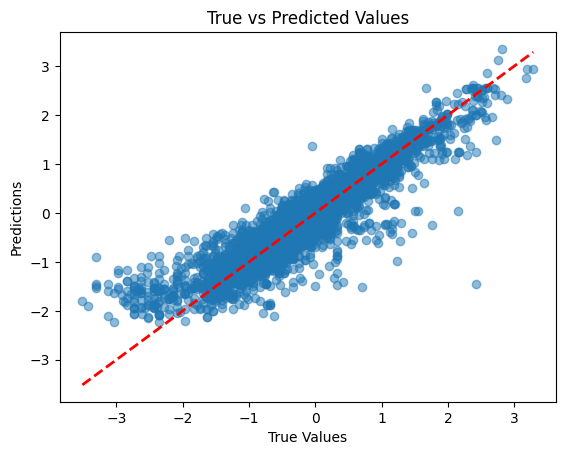

In [ ]:
plt.scatter(testY, predY, alpha=0.5, label='Predictions')

# Добавление прямой y = x
plt.plot([min(testY), max(testY)], [min(testY), max(testY)],
         linestyle='--', color='red', linewidth=2, label='y = x')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

видим что данные достаточно неплохо распределяются, но чуть косит левый конец.

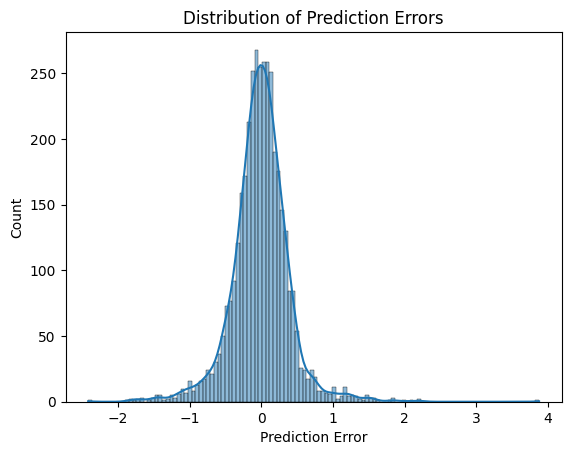

In [ ]:
errors = testY - predY
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.show()

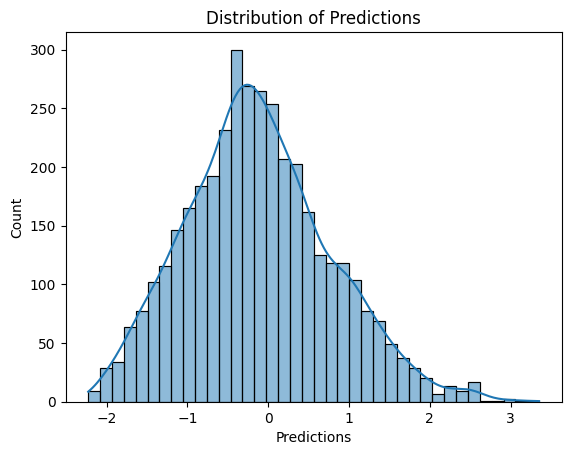

In [ ]:
sns.histplot(predY, kde=True)
plt.xlabel('Predictions')
plt.title('Distribution of Predictions')
plt.show()

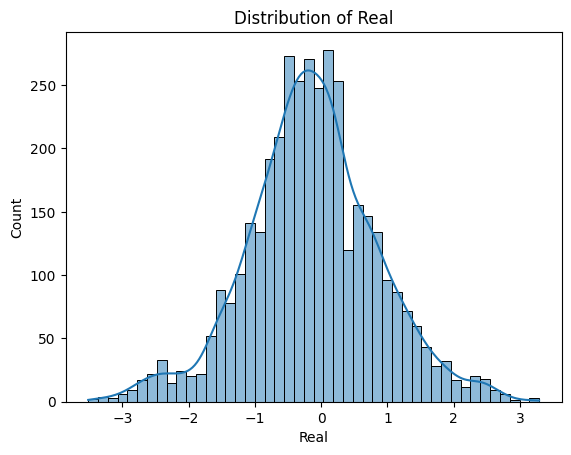

In [ ]:
sns.histplot(testY, kde=True)
plt.xlabel('Real')
plt.title('Distribution of Real')
plt.show()

можно увидеть, что количество ошибок возрастает в нуле, но это логично, так как тут в целом больше значений, хотя не стоит и отметать вариант, что значения около нуля связаны с ошибками

#Выводы

**Гиперпараметры модели**: Лучшая модель была найдена с использованием полиномиальных признаков степени 3 и linear__fit_intercept. Но без использование PCA.

**Анализ ошибок**: Ошибки модели распределены нормально, что указывает на отсутствие систематических ошибок. Однако, местами, даже слишком нормально в сравнении с реальными значениями.

**Рекомендации**: Для дальнейшего улучшения модели можно попробовать добавить больше внешних данных или использовать более сложные модели, такие как градиентный бустинг.